In [10]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error 
import statsmodels.api as sm
plt.style.use('fivethirtyeight')

In [3]:
df = pd.read_csv('data/VN30.csv')
df.drop(columns= 'Unnamed: 0', inplace= True)
df.head()

,Date,ACB,MWG,MSN,BID,VRE,POW,PLX,HPG,VNM,...,GVR,SAB,BCM,MBB,GAS,SSB,SHB,SSI,STB,VPB
0,2020-01-02,9460,37730,46160,32369,34350,11352,48590,10930,82450,...,10150.0,100180,28160.0,9680,68440,NaN,2990.0,8740,10200,7250
1,2020-01-03,9460,37170,46570,32229,34600,11161,49100,11000,82720,...,10500.0,100440,27880.0,9700,68590,NaN,2900.0,8670,10200,7200
2,2020-01-06,9260,36990,45830,31610,33650,10827,49280,10930,82090,...,10320.0,100080,27590.0,9560,70760,NaN,2860.0,8640,10050,7030
3,2020-01-07,9260,37270,46000,32229,33950,10731,48590,10790,82860,...,10050.0,100180,26830.0,9580,70250,NaN,2860.0,8670,10150,7180
4,2020-01-08,9090,36370,45350,32509,32700,10254,47910,10680,83060,...,9700.0,99810,26640.0,9450,70180,NaN,2860.0,8430,9980,7090


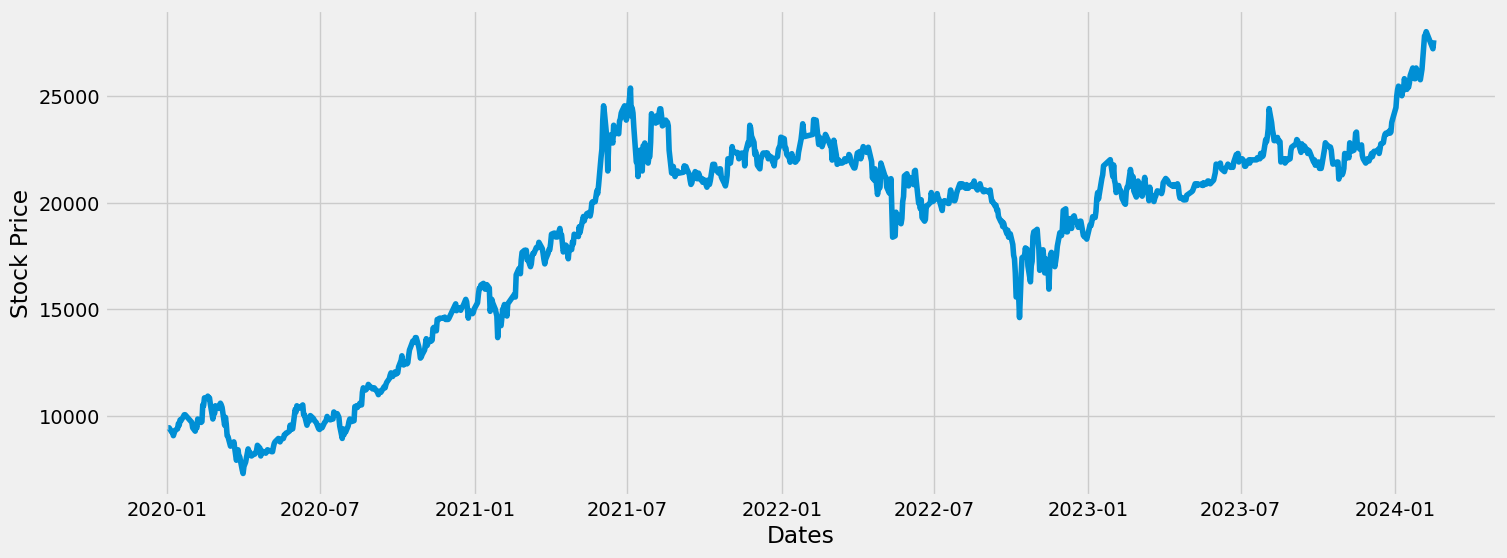

In [11]:
plt.figure(figsize=(16, 6))
plt.grid(True)
x = pd.to_datetime(df['Date'])
plt.plot(x, df['ACB'])
plt.xlabel("Dates")
plt.ylabel("Stock Price")
plt.show()

In [5]:
train_data = df[:996]
test_data = df[996:]
print("Dữ liệu tập train \n", train_data)
print("Dữ liệu tập test \n", test_data)

Dữ liệu tập train 
            Date    ACB    MWG    MSN    BID    VRE    POW    PLX    HPG  \
0    2020-01-02   9460  37730  46160  32369  34350  11352  48590  10930   
1    2020-01-03   9460  37170  46570  32229  34600  11161  49100  11000   
2    2020-01-06   9260  36990  45830  31610  33650  10827  49280  10930   
3    2020-01-07   9260  37270  46000  32229  33950  10731  48590  10790   
4    2020-01-08   9090  36370  45350  32509  32700  10254  47910  10680   
..          ...    ...    ...    ...    ...    ...    ...    ...    ...   
991  2023-12-25  23350  42650  66400  43200  23400  11300  34650  27450   
992  2023-12-26  23250  42700  66200  43000  23300  11250  34450  27800   
993  2023-12-27  23300  42850  67000  43000  23250  11150  34450  27750   
994  2023-12-28  23750  43050  67000  42700  23500  11250  34500  27950   
995  2023-12-29  23900  42800  67000  43400  23300  11250  34500  27950   

       VNM  ...      GVR     SAB      BCM    MBB    GAS      SSB      SHB  \
0 

In [9]:
train = train_data['SSI'].values
test = test_data['SSI'].values

# Sử dụng mô hình ARIMA
history = [x for x in train]
model_predictions = []
N_test_observations = len(test)

for time_point in range(N_test_observations):
    model = ARIMA(history, order= (4,1,0))
    model_fit = model.fit()
    output = model_fit.forecast()       
    yhat = output[0]
    model_predictions.append(yhat)
    true_test_value = test[time_point]
    history.append(true_test_value)
MSE_error = mean_squared_error(test, model_predictions)
print('Testing Mean Squared Error is {}'.format(MSE_error))

Testing Mean Squared Error is 89330.4741780553


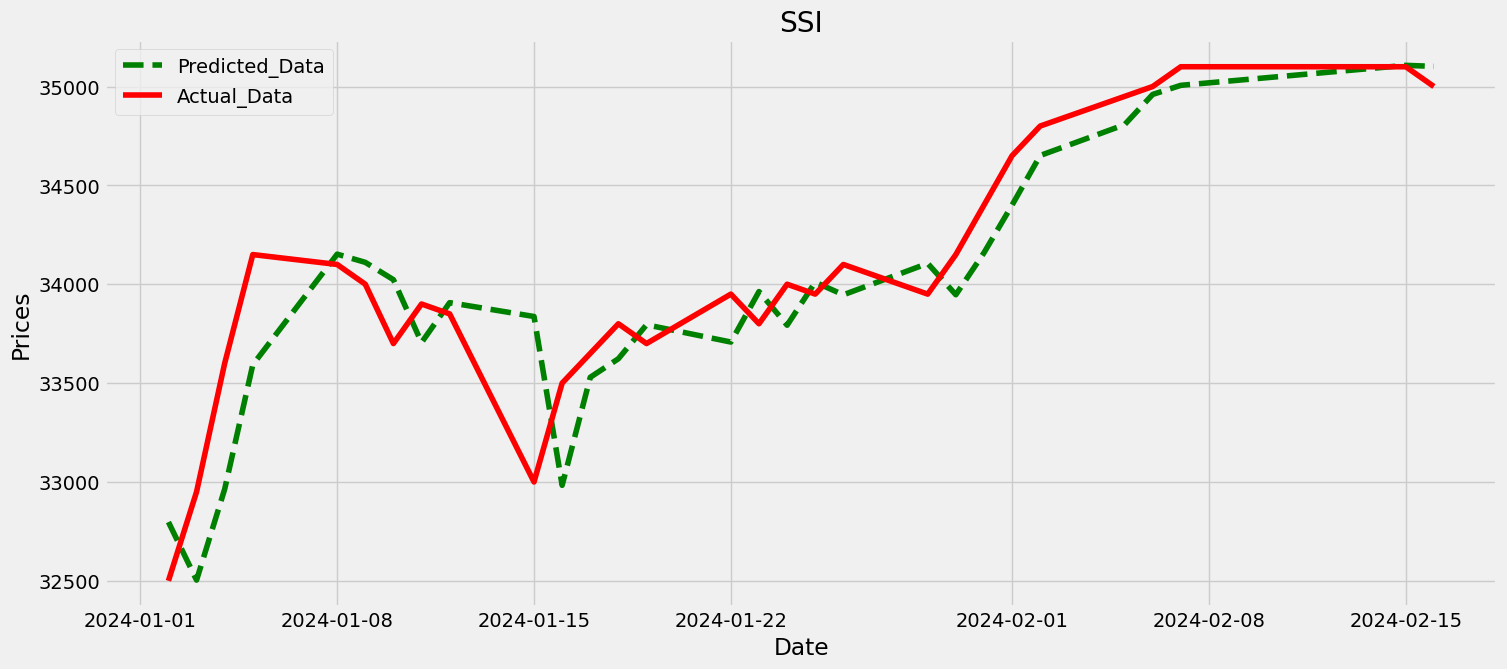

In [12]:
plt.figure(figsize=(16,7))
plt.grid(True)

date = pd.to_datetime(test_data['Date'])

plt.plot(date, model_predictions, color='green',linestyle='dashed',label='Predicted_Data')
plt.plot(date, test_data['SSI'], color='red', label='Actual_Data')

plt.title('SSI')
plt.xlabel('Date')
plt.ylabel('Prices')
plt.legend()
plt.show()

In [33]:
history = [x for x in train]
predictions = []
model = ARIMA(history, order=(7,0,1))
model_fit = model.fit()
# multi-step out-of-sample forecast
forecast = model_fit.forecast(steps=7)
for yhat in forecast:
    predictions.append(yhat)
predictions

[32819.24998887072,
 32833.22244707955,
 32835.5531073281,
 32841.540058507475,
 32825.43631535518,
 32822.336146091104,
 32835.34492467124]

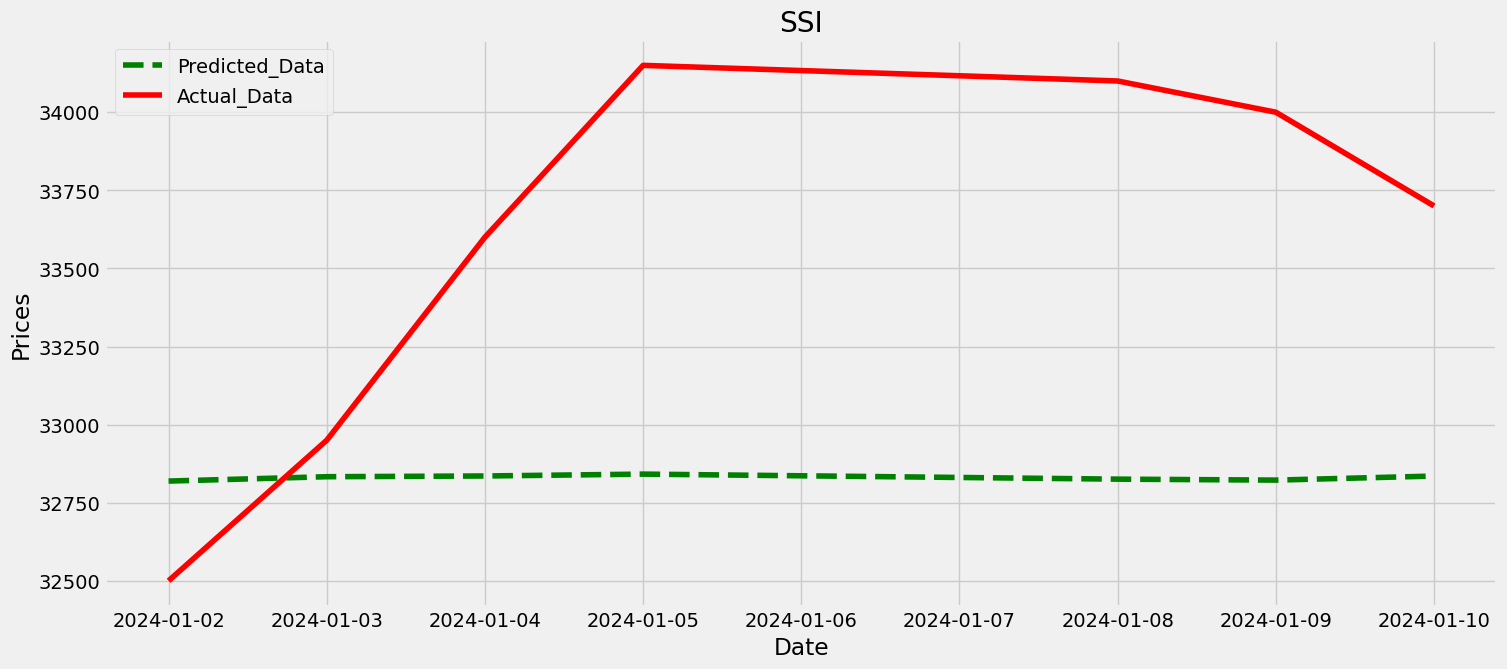

In [34]:
plt.figure(figsize=(16,7))
plt.grid(True)

date = pd.to_datetime(test_data[:7]['Date'])

plt.plot(date, predictions, color='green',linestyle='dashed',label='Predicted_Data')
plt.plot(date, test_data[:7]['SSI'], color='red', label='Actual_Data')

plt.title('SSI')
plt.xlabel('Date')
plt.ylabel('Prices')
plt.legend()
plt.show()